## Project Battle
This project will use basic natural language processing techniques to perform analysis on customer reviews of two well known video games franchises - Battlefield and Call of Duty.
Both games are traditional first person shooters (FPS) with multiplayer game modes. They compete for customer playing time to fill in their servers and keep the game alive. Both have large fan/player communities that look forward to the next release (usually with very high expections) 

- First, I will use webscraping techniques to get customer reviews of 2 recent releases from each franchise.
    - https://www.metacritic.com/game/playstation-4/battlefield-1
    - https://www.metacritic.com/game/playstation-4/battlefield-v
    - https://www.metacritic.com/game/playstation-4/call-of-duty-black-ops-4
    - https://www.metacritic.com/game/playstation-4/call-of-duty-infinite-warfare
- Second, I will prepare the data for analysis by performing cleaning and processing work.
- Third, Tokenize the data and perform exploratory analysis.
- Lastly, Use clustering techniques to find out topics that negative customer reviews tend to converge into (aka topic model) 

## Scrape data from Metacritic.com

In [1]:
# Load libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\ochib\miniconda3\envs\nlp_course\lib\site-packages\requests\__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
# Let's build a function and scrape other games
def scrape_game_reviews(url_without_page, page_max, game_name):
    
    """
    Scrape game reviews from metacritic
    
    url_without_page: a string containing the url of the page to be scraped; remove the page number
    page_max: input the number of the last page of the user review list
    game_name: string containing the name of the game
    
    """
    headers = {"user-agent": "user-agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36"}
    no = []
    name = []
    date = []
    score = []
    review = []
    game_title = []
    print(f"Preparing to scrape {game_name}...")
    
    for pg in range(page_max):        
        url = url_without_page+str(pg)
        page = requests.get(url, headers=headers)
        soup=BeautifulSoup(page.content, "html.parser")
        print(f"starting page {pg}...")
        for idx, reviews in enumerate(soup.findAll("div", class_="review_section")):
            
            no.append(idx)
            try:
                name.append(soup.findAll("div", class_="name")[idx].text.replace("\n",""))
            except:
                name.append("NA")
            try:
                date.append(soup.findAll("div", class_="date")[idx].text.replace("\n",""))
            except:
                date.append("NA")
            try:
                score.append(soup.findAll("div", class_="review_grade")[idx].text.replace("\n",""))
            except:
                score.append("NA")
            try:
                review.append(soup.findAll("div", class_="review_body")[idx].text.replace("\n",""))
            except:
                review.append("NA")
            try:
                game_title.append(game_name)
            except:
                game_title.append("NA")

                    
    print("storing the data...")
    # Store lists into a dictionary
    review_data = {"game_title": game_title, "name":name, "date":date, "score":score, "review":review}
    print(f"{game_name} scraped successfully!")
    return review_data

In [3]:
# Scrape Battlefield 1

# Inputs for my webscraping function
url = "https://www.metacritic.com/game/playstation-4/battlefield-1/user-reviews?sort-by=date&num_items=100&page="
pg = 5
name = "Battlefield 1"

# Run function and store the dictionary output
review = scrape_game_reviews(url, pg, name)

# Transfer data into a dataframe
bf1 = pd.DataFrame(review)

# Remove NAs
bf1 = bf1[bf1["name"]!="NA"]

Preparing to scrape Battlefield 1...
starting page 0...
starting page 1...
starting page 2...
starting page 3...
starting page 4...
storing the data...
Battlefield 1 scraped successfully!


In [4]:
bf1.shape

(420, 5)

In [5]:
# Scrape Battlefield 5

# Inputs for my webscraping function
url = "https://www.metacritic.com/game/playstation-4/battlefield-v/user-reviews?sort-by=date&num_items=100&page="
pg = 10
name = "Battlefield 5"

# Run function and store the dictionary output
review = scrape_game_reviews(url, pg, name)

# Transfer data into a dataframe
bf5 = pd.DataFrame(review)

# Remove NAs
bf5 = bf5[bf5["name"]!="NA"]

Preparing to scrape Battlefield 5...
starting page 0...
starting page 1...
starting page 2...
starting page 3...
starting page 4...
starting page 5...
starting page 6...
starting page 7...
starting page 8...
starting page 9...
storing the data...
Battlefield 5 scraped successfully!


In [6]:
bf5.shape

(914, 5)

In [7]:
# Scrape Call of Duty Black Ops 4

# Inputs for my webscraping function
url = "https://www.metacritic.com/game/playstation-4/call-of-duty-black-ops-4/user-reviews?sort-by=date&num_items=100&page="
pg = 10
name = "Call of Duty BO4"

# Run function and store the dictionary output
review = scrape_game_reviews(url, pg, name)

# Transfer data into a dataframe
codbo4 = pd.DataFrame(review)

# Remove NAs
codbo4 = codbo4[codbo4["name"]!="NA"]

Preparing to scrape Call of Duty BO4...
starting page 0...
starting page 1...
starting page 2...
starting page 3...
starting page 4...
starting page 5...
starting page 6...
starting page 7...
starting page 8...
starting page 9...
storing the data...
Call of Duty BO4 scraped successfully!


In [8]:
codbo4.shape

(552, 5)

In [9]:
# Scrape Call of Duty Black Ops 4

# Inputs for my webscraping function
url = "https://www.metacritic.com/game/playstation-4/call-of-duty-infinite-warfare/user-reviews?sort-by=date&num_items=100&page="
pg = 10
name = "Call of Duty IW"

# Run function and store the dictionary output
review = scrape_game_reviews(url, pg, name)

# Transfer data into a dataframe
codiw = pd.DataFrame(review)

# Remove NAs
codiw = codiw[codiw["name"]!="NA"]

Preparing to scrape Call of Duty IW...
starting page 0...
starting page 1...
starting page 2...
starting page 3...
starting page 4...
starting page 5...
starting page 6...
starting page 7...
starting page 8...
starting page 9...
storing the data...
Call of Duty IW scraped successfully!


In [10]:
codiw.shape

(406, 5)

In [11]:
# Let's store the reviews in a pickle format
# Next time I open this notebook, I can start from here

import pickle

#bf1.to_pickle("bf1_reviews.pickle")
#bf5.to_pickle("bf5_reviews.pickle")
#codbo4.to_pickle("codbo4_reviews.pickle")
#codiw.to_pickle("codiw_reviews.pickle")

In [12]:
bf5.head()

,game_title,name,date,score,review
0,Battlefield 5,FrostySlsuhie,"Jul 13, 2022",7,"It runs very well, but the problems lie in the..."
1,Battlefield 5,ThatPSXBGamer,"Jul 11, 2022",5,"Wow, this game is absolutely brutal and clearl..."
2,Battlefield 5,Goji0v,"Jun 20, 2022",8,After last BF this is really so good. Optimiza...
3,Battlefield 5,DRAVBER,"Jun 18, 2022",0,"гендер филд 5\r0 фемок из 10\rЕдинственный +, ..."
4,Battlefield 5,Skapple,"May 29, 2022",0,i didn't play the game on realease but rn it's...


## Process the Data

In [13]:
# Load libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

bf1 = pd.read_pickle("bf1_reviews.pickle")
bf5 = pd.read_pickle("bf5_reviews.pickle")
codbo4 = pd.read_pickle("codbo4_reviews.pickle")
codiw = pd.read_pickle("codiw_reviews.pickle")

In [14]:
# Use langid library to automatically detect languages

import langid
bf5["lang"] = bf5.apply(lambda x: langid.classify(x["review"])[0], axis=1)
bf1["lang"] = bf1.apply(lambda x: langid.classify(x["review"])[0], axis=1)
codbo4["lang"] = codbo4.apply(lambda x: langid.classify(x["review"])[0], axis=1)
codiw["lang"] = codiw.apply(lambda x: langid.classify(x["review"])[0], axis=1)

In [15]:
bf5[bf5["lang"]=="en"].head()

,game_title,name,date,score,review,lang
0,Battlefield 5,Goji0v,"Jun 20, 2022",8,After last BF this is really so good. Optimiza...,en
2,Battlefield 5,Skapple,"May 29, 2022",0,i didn't play the game on realease but rn it's...,en
4,Battlefield 5,angrygamer333,"Jul 7, 2019",6,The most dissapointing game of the battlefield...,en
6,Battlefield 5,DoritosGamer,"Mar 21, 2022",8,"One of the best Battlefield i was played, he h...",en
7,Battlefield 5,dankmeow,"Mar 16, 2022",7,Its battlefield again but it feels it doesnt q...,en


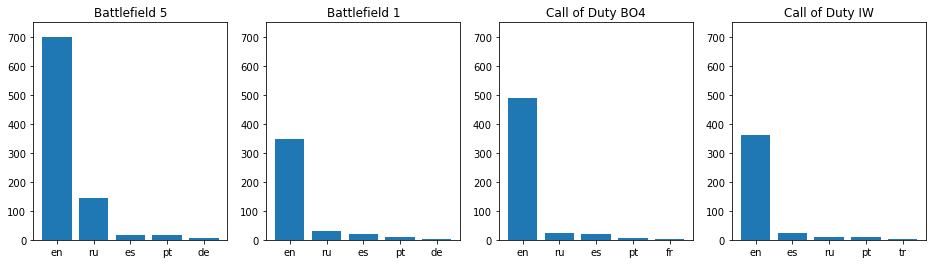

In [16]:
# Just out of curiosity, let's which languages reviews were written in:
def count_top5_languages(data):
    return data[["lang", "review"]].groupby("lang").agg("count").sort_values("review", ascending=False).head()


fig, axs = plt.subplots(1,4, figsize=(16,4))
for ax, game in zip(axs.ravel(), [bf5, bf1, codbo4, codiw]):
    lang_count = count_top5_languages(game)
    ax.bar(x=lang_count.index, height=lang_count["review"])
    ax.set_title(game.loc[0,"game_title"])
    ax.set_ylim(0,750)
    plt.tight_layout

There are reviews written in languages other than English. We will need to remove those before tokenization.

In [17]:
bf5_en = bf5[bf5["lang"]=="en"].reset_index(drop=True)
bf1_en = bf1[bf1["lang"]=="en"].reset_index(drop=True)
codbo_en = codbo4[codbo4["lang"]=="en"].reset_index(drop=True)
codiw_en = codiw[codiw["lang"]=="en"].reset_index(drop=True)

# Shapes of each dataset (only English reviews)
print(bf5_en.shape)
print(bf1_en.shape)
print(codbo_en.shape)
print(codiw_en.shape)

(700, 6)
(347, 6)
(489, 6)
(362, 6)


In [18]:
# Remove \r string
bf5_en["review"] = bf5_en.apply(lambda x: x["review"].replace("\r", ""), axis=1)
bf5_en.head()

,game_title,name,date,score,review,lang
0,Battlefield 5,Goji0v,"Jun 20, 2022",8,After last BF this is really so good. Optimiza...,en
1,Battlefield 5,Skapple,"May 29, 2022",0,i didn't play the game on realease but rn it's...,en
2,Battlefield 5,angrygamer333,"Jul 7, 2019",6,The most dissapointing game of the battlefield...,en
3,Battlefield 5,DoritosGamer,"Mar 21, 2022",8,"One of the best Battlefield i was played, he h...",en
4,Battlefield 5,dankmeow,"Mar 16, 2022",7,Its battlefield again but it feels it doesnt q...,en


## Tokenization

In [19]:
# Import Spacy with English vocabulary 
import spacy
import en_core_web_sm

nlp = spacy.load("en_core_web_sm")

In [20]:
# Let's tokenize the first BF5 review and check results
# Make sure to remove punctionations

doc = nlp(bf5_en["review"][1])
for token in doc:
    if token.pos_ == "PUNCT":
        pass
    else: 
        print(f"{token.text:{12}} {token.lemma_:{15}} {token.pos_:{8}} {token.dep_:{10}} {token.tag_:{5}} {token.is_stop:{5}}")

i            i               PRON     nsubj      PRP       1
did          do              VERB     aux        VBD       1
n't          not             ADV      neg        RB        0
play         play            VERB     ROOT       VB        0
the          the             DET      det        DT        1
game         game            NOUN     dobj       NN        0
on           on              ADP      prep       IN        1
realease     realease        NOUN     pobj       NN        0
but          but             CCONJ    cc         CC        1
rn           rn              ADP      ROOT       IN        0
it           -PRON-          PRON     nsubj      PRP       1
's           be              VERB     ROOT       VBZ       0
very         very            ADV      advmod     RB        1
fun          fun             ADJ      acomp      JJ        0
and          and             CCONJ    cc         CC        1
i            i               PRON     nsubj      PRP       1
like         like       

In [21]:
# All seems to be working fine.
# Let's make a list of relevant tokens for each video game.

# Customize stop words
for new_stopword in ['battlefield','bf','game', 'games', '1','3', 'this', 'the', '\r', '\r ', '\r  ', ' ', "'s", 'like', 'cod', 'black', 'ops', '2', '>', '4', 'play', 'warfare', 'infinite', 'expand', 'feel', "'ve"]:
    nlp.Defaults.stop_words.add(new_stopword)
    nlp.vocab[new_stopword].is_stop = True
    
# Grabs dataframe, loops through every review, tokenize every relevant word, and stores it in a list
def tokenize_and_store(input_data):
    output_data = []
    for idx in range(input_data.shape[0]):
        doc = nlp(input_data.loc[idx,"review"])
        for token in doc:
            if nlp.vocab[str(token.lower_)].is_stop == False and token.is_punct == False and token.lemma_ != "be" and token.lemma_ != "not"and token.pos_ != "PRON":
                output_data.append(token.lower_)
    return output_data

In [22]:
#nlp.Defaults.stop_words.remove("ww2")
#nlp.vocab[new_stopword].is_stop = False

In [23]:
# Run function for every game

bf5_en_words = tokenize_and_store(bf5_en)
bf1_en_words = tokenize_and_store(bf1_en)
codbo_en_words = tokenize_and_store(codbo_en)
codiw_en_words = tokenize_and_store(codiw_en)

In [24]:
# Count word occurrences in each game review

from collections import Counter
word_freq_bf5 = Counter(bf5_en_words)
word_freq_bf1 = Counter(bf1_en_words)
word_freq_codbo = Counter(codbo_en_words)
word_freq_codiw = Counter(codiw_en_words)

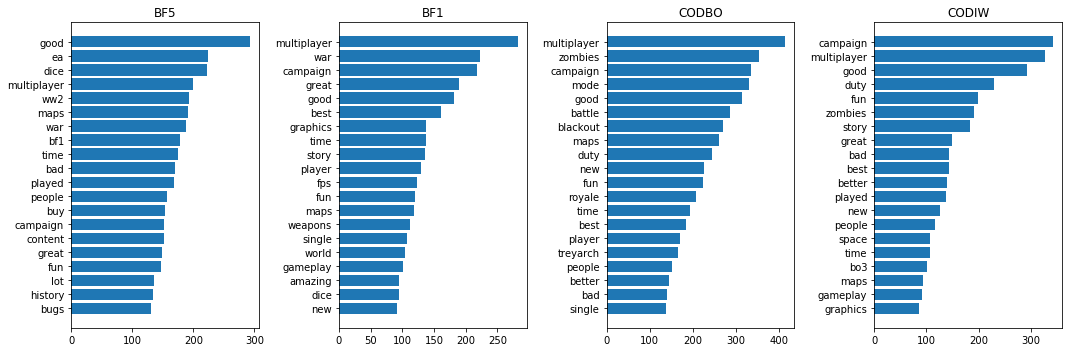

In [25]:
# Visualize top X words for each game review

def build_mostcommon_graph(word_freq_data, top_x=20, fig_width=15, fig_height=5):
    fig, axs = plt.subplots(1,4, figsize=(fig_width,fig_height))
    for ax, freq, title in zip(axs.ravel(), word_freq_data, ["BF5", "BF1", "CODBO", "CODIW"]):
        y = [i[0] for i in freq.most_common(top_x)]
        width = [i[1] for i in freq.most_common(top_x)] 
        vizdata = pd.DataFrame(data = list(zip(y, width)), columns=["y","width"]).sort_values("width", ascending=True)
        ax.barh (vizdata["y"], vizdata["width"])
        ax.set_title(title)
    plt.tight_layout()
    return plt.show()
    
build_mostcommon_graph([word_freq_bf5, word_freq_bf1, word_freq_codbo, word_freq_codiw])

A quick glimpse of what has been talked about the games. The list for BF5, COD Blackops, and COD Infinite Warfare shows the word "bad" among top 20 most quoted words. It seems like zombies are a major part of COD games.

## Wordcloud

In [26]:
# let's try to visualize top occurrences for each game in a word cloud
# First we need to process all reviews to become a single string

# tupple containing game name and reviews
reviews_list = list(zip(["BF5", "BF1", "CODBO", "CODIW"],[bf5_en["review"], bf1_en["review"], codbo_en["review"], codiw_en["review"]]))

# loop and merge all reviews into a single string
onestring = []
for k, v in reviews_list:
    text_list = ""
    for t in v:
        text_list += "".join(t.lower())
    onestring.append(text_list)

# rebuild tuple with a third element containing the string    
reviews_list_string = list(zip(["BF5", "BF1", "CODBO", "CODIW"],[bf5_en["review"], bf1_en["review"], codbo_en["review"], codiw_en["review"]], onestring))

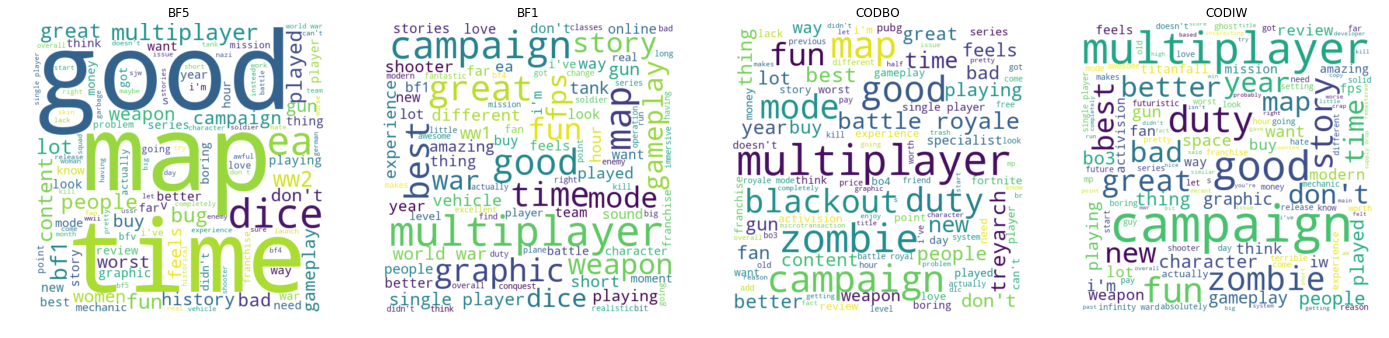

In [27]:
# Create wordcloud
from wordcloud import WordCloud, STOPWORDS

fig, axs = plt.subplots(1,4, figsize=(24,15))
for ax, review in zip(axs.ravel(), reviews_list_string):
    wordcloud = WordCloud(width = 500, height = 500,
            background_color ='white',
            stopwords = nlp.Defaults.stop_words,
            min_font_size = 10).generate(review[2])
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(review[0])
    ax.axis("off")
plt.show()

## Co-Occurrence Network

In [28]:
# Let's try to build a co-occurrence network
# co-occurrence network is a visualization method that shows word count as nodes and word relationships (words that co-occur) as edges   
# The idea is to see groups of words that tend to appear together and generate insights about the context of each review 
# This is the first time I build a co-occurrence network, so I will test the algorithm using only BF5 data

import numpy as np
import itertools

# let's set a threshold of minimum word count
def min_word_count(x, word_freq_data):
    c_words = [w for w,k in word_freq_data.items() if k > x and w not in nlp.Defaults.stop_words]
    c_counts = [k for w,k in word_freq_data.items() if k > x and w not in nlp.Defaults.stop_words]
    return c_words, c_counts

# Minimum word count is 100 (words that appear less than 100 times will not be included in the visualization)
c_words, c_counts = min_word_count(100, word_freq_bf5)

# check
print(c_words)
print()
print(c_counts)

['good', 'gameplay', 'fun', 'lot', 'bugs', 'played', 'maps', 'feels', 'bf1', 'player', 'story', 'dice', 'war', 'worst', 'great', 'history', 'people', 'campaign', 'ww2', 'time', 'multiplayer', 'bad', 'new', 'playing', 'buy', 'ea', 'women', 'content', 'historical']

[293, 122, 147, 136, 130, 169, 191, 117, 178, 110, 123, 223, 188, 127, 149, 134, 157, 152, 193, 175, 199, 170, 112, 122, 153, 224, 124, 152, 101]


In [29]:
# We need to build a matrix of word occurrence
# I use itertools.combinations function to get unique pairs of the selected words

c_word_combinations = []

for x in itertools.combinations(c_words,2):
    c_word_combinations.append(x)

# check
c_word_combinations[:10]

[('good', 'gameplay'),
 ('good', 'fun'),
 ('good', 'lot'),
 ('good', 'bugs'),
 ('good', 'played'),
 ('good', 'maps'),
 ('good', 'feels'),
 ('good', 'bf1'),
 ('good', 'player'),
 ('good', 'story')]

In [30]:
# To build the matrix of co-occurrences, I first build a matrix contianing zero values
# matrix dimensions are the number of selected words we have for this exercise

combination_matrix = np.zeros((len(c_words), len(c_words)))
combination_matrix[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [31]:
# Now I loop over each review in the dataframe for BF5
# I add +1 to row / column in the combination matrix if the pair appear in the review

for review in bf5_en["review"]:
    for word1, word2 in c_word_combinations:
        if word1 in review and word2 in review:
            combination_matrix[c_words.index(word1), c_words.index(word2)] += 1
            combination_matrix[c_words.index(word2), c_words.index(word1)] += 1

In [32]:
# This is how the combination matrix look like now
# This is also called "word co-occurrence matrix" and it shows numerically how words appears together 
combination_matrix[:5]

array([[  0.,  24.,  42.,  38.,  27.,  29.,  37.,  27.,   4.,  64.,  41.,
          4.,  39.,  19.,  26.,  20.,  37.,  27.,   9.,  48.,  30.,  44.,
         25.,  24.,  29., 125.,  19.,  38.,  21.],
       [ 24.,   0.,  22.,  20.,  16.,   8.,  21.,  14.,   3.,  32.,  21.,
          4.,  22.,   9.,  19.,  14.,  10.,  11.,   6.,  22.,  17.,  22.,
         18.,  19.,  21.,  59.,  13.,  19.,  17.],
       [ 42.,  22.,   0.,  32.,  24.,  26.,  38.,  24.,   3.,  50.,  20.,
          5.,  30.,  12.,  32.,  13.,  26.,  22.,   6.,  41.,  31.,  19.,
         24.,  23.,  22.,  89.,  17.,  23.,  23.],
       [ 38.,  20.,  32.,   0.,  32.,  26.,  28.,  12.,   4.,  43.,  24.,
          4.,  20.,  13.,  21.,  14.,  22.,  20.,   7.,  32.,  20.,  22.,
         20.,  19.,  21.,  74.,  12.,  25.,   9.],
       [ 27.,  16.,  24.,  32.,   0.,  15.,  26.,  12.,   3.,  36.,  24.,
          1.,  17.,   7.,  16.,  12.,  16.,   8.,   2.,  25.,  18.,  21.,
         17.,  17.,  18.,  63.,  16.,  24.,  14.]])

In [33]:
# Here we use Jaccard similarity coefficient.
# This coefficient is used to represent how strongly each word is associated with its pair.

from scipy.spatial import distance

jaccard_matrix = 1-distance.cdist(combination_matrix, combination_matrix, 'jaccard')
jaccard_matrix[:4]

array([[1.        , 0.03448276, 0.        , 0.06896552, 0.        ,
        0.        , 0.03448276, 0.        , 0.        , 0.        ,
        0.03448276, 0.        , 0.06896552, 0.        , 0.        ,
        0.        , 0.03448276, 0.03448276, 0.        , 0.06896552,
        0.        , 0.        , 0.03448276, 0.        , 0.03448276,
        0.        , 0.        , 0.        , 0.03448276],
       [0.03448276, 1.        , 0.06896552, 0.17241379, 0.03448276,
        0.03448276, 0.06896552, 0.03448276, 0.        , 0.        ,
        0.        , 0.        , 0.06896552, 0.10344828, 0.10344828,
        0.03448276, 0.13793103, 0.17241379, 0.        , 0.        ,
        0.03448276, 0.06896552, 0.03448276, 0.03448276, 0.06896552,
        0.        , 0.03448276, 0.03448276, 0.        ],
       [0.        , 0.06896552, 1.        , 0.03448276, 0.06896552,
        0.03448276, 0.06896552, 0.03448276, 0.        , 0.        ,
        0.10344828, 0.        , 0.17241379, 0.03448276, 0.10344828,
  

In [34]:
# Now we will build the node data that will feed the co-occurrence network

def build_nodes(selected_words, selected_counts, jaccard_matrix, focus_word=None):
    nodes = []
    for i in range(len(selected_words)):
        for j in range(i+1, len(selected_words)):
            jaccard = jaccard_matrix[i, j]
            if focus_word:
                if jaccard > 0 and (selected_words[i]==focus_word or c_words[j]==focus_word):
                    nodes.append([selected_words[i], selected_words[j], selected_counts[i], selected_counts[j], jaccard])
            else:
                if jaccard > 0:
                    nodes.append([selected_words[i], selected_words[j], selected_counts[i], selected_counts[j], jaccard])
    return nodes

nodes = build_nodes(c_words, c_counts, jaccard_matrix)
nodes[:10]

[['good', 'gameplay', 293, 122, 0.03448275862068961],
 ['good', 'lot', 293, 136, 0.06896551724137934],
 ['good', 'maps', 293, 191, 0.03448275862068961],
 ['good', 'story', 293, 123, 0.03448275862068961],
 ['good', 'war', 293, 188, 0.06896551724137934],
 ['good', 'people', 293, 157, 0.03448275862068961],
 ['good', 'campaign', 293, 152, 0.03448275862068961],
 ['good', 'time', 293, 175, 0.06896551724137934],
 ['good', 'new', 293, 112, 0.03448275862068961],
 ['good', 'buy', 293, 153, 0.03448275862068961]]

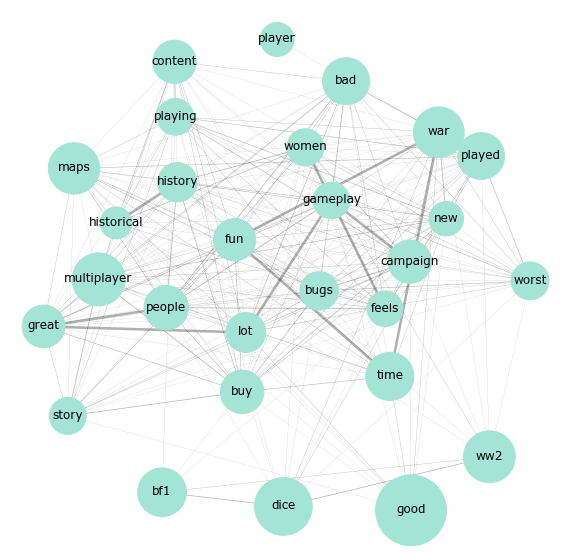

In [35]:
# Build co-occurrence network

import networkx as nx
            
def build_cooccurrence_network(network_data):
    G = nx.Graph()
    G.nodes(data=True)
        
    # Add nodes and edges
    for pair in nodes:
        node_x, node_y, node_x_cnt, node_y_cnt, jaccard = pair[0], pair[1], pair[2], pair[3], pair[4]
        if not G.has_node(node_x):
            G.add_node(node_x, count=node_x_cnt)
        if not G.has_node(node_y):
            G.add_node(node_y, count=node_y_cnt)
        if not G.has_edge(node_x, node_y):
            G.add_edge(node_x, node_y, weight=jaccard)

    # Use spring layout to set node position

    plt.figure(figsize=(10,10))
    pos = nx.spring_layout(G, k=1, seed=10)

    node_size = [d['count']**1.5 for (n,d) in G.nodes(data=True)]
    nx.draw_networkx_nodes(G, pos, node_color='#A3E4D7', alpha=1, node_size=node_size)
    nx.draw_networkx_labels(G, pos, fontsize=14, font_family='Verdana')

    edge_width = [d['weight']*15 if d['weight']>0.17 else d['weight']*5 for (u,v,d) in G.edges(data=True)]
    nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color='black', width=edge_width)
    plt.axis('off')
    return plt.show()

build_cooccurrence_network(nodes)

# Note that nodes sitting close to each other doesnt necessarilly mean that they tend to appear together
# The analyst needs to check the thickness of the lines to see if one node is strongly associated with another

The co-occurrence network above was built using words with more than 100 appearances. It looks quite busy so I will focus ona single word and rebuilt the visualization. 

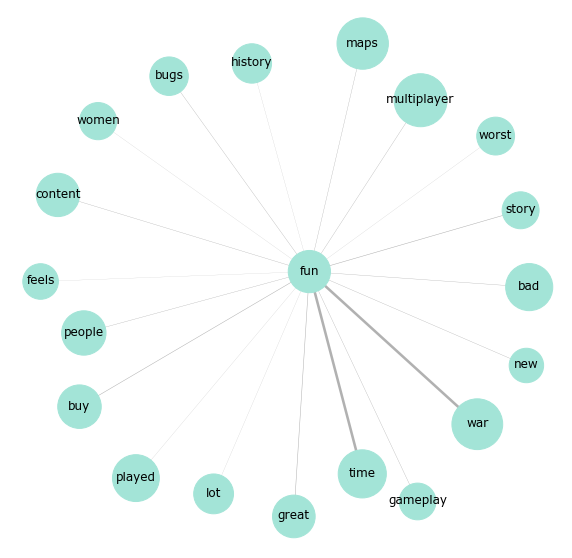

In [36]:
# Let's focus on a single word of interest
nodes = build_nodes(c_words, c_counts, jaccard_matrix, "fun")
build_cooccurrence_network(nodes)

Strong associations between the words "fun"-"time", "fun"-"war", "fun"-"story".

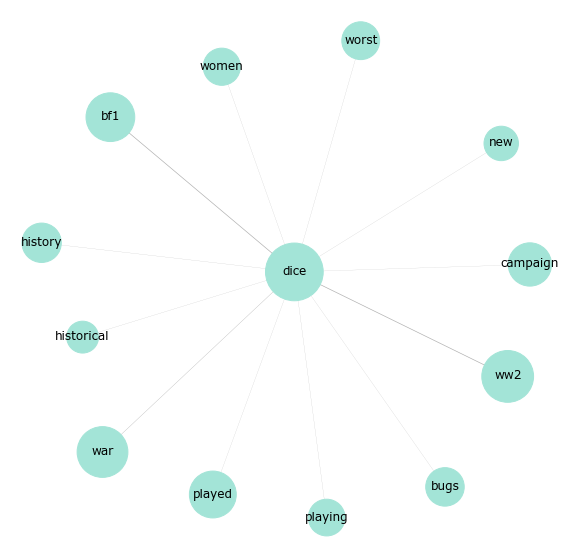

In [37]:
# Let's try "dice", which is the company in charge of the game development 
nodes = build_nodes(c_words, c_counts, jaccard_matrix, "dice")
build_cooccurrence_network(nodes)

We wee words like "bugs" and "worst" associated with Dice. Indeed, Battlefield 5 did have problems related to bugs in the first couple of months after release.

## Sentiment Analysis

In [38]:
# Import nltk library and use vader to analyze sentiment
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

C:\Users\ochib\miniconda3\envs\nlp_course\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ochib\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


C:\Users\ochib\miniconda3\envs\nlp_course\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [39]:
# Extract polarity scores to reviews
sid = SentimentIntensityAnalyzer()

bf5_en["sid"] =  bf5_en.apply(lambda x : sid.polarity_scores(x["review"])["compound"], axis=1)
bf1_en["sid"] =  bf1_en.apply(lambda x : sid.polarity_scores(x["review"])["compound"], axis=1)
codbo_en["sid"] =  codbo_en.apply(lambda x : sid.polarity_scores(x["review"])["compound"], axis=1)
codiw_en["sid"] =  codiw_en.apply(lambda x : sid.polarity_scores(x["review"])["compound"], axis=1)

In [40]:
# Let's check the first review of BF5 and BF1

print(bf5_en.loc[0,"review"])
print(bf5_en.loc[0,"sid"])
print()
print(bf1_en.loc[0,"review"])
print(bf1_en.loc[0,"sid"])

After last BF this is really so good. Optimization and gameplay on a mid level, but we don't have any other good BF with live online. I recommended this if you wanna play some BF!
0.9417

Battlefield 1 offers a great multiplayer experience but a poor single player one.
-0.5267


NLTK assigns a high score for the first review of BF5, which means that it detects it as a positive sentiment. <br>
For BF1, we see that the review is mixed, but NLTK assigns a fairly negative tone to it. Sentiment analysis is known for not being able to be very good at catching the sentiment of mixed reviews like this. 

In [41]:
# let's process the date column.
# I want to see how scores trend over time

from datetime import datetime
bf5_en["date_fmt"] = bf5_en.apply(lambda x : datetime.strptime(x["date"], "%b %d, %Y"), axis=1)
bf1_en["date_fmt"] = bf1_en.apply(lambda x : datetime.strptime(x["date"], "%b %d, %Y"), axis=1)
codbo_en["date_fmt"] = codbo_en.apply(lambda x : datetime.strptime(x["date"], "%b %d, %Y"), axis=1)
codiw_en["date_fmt"] = codiw_en.apply(lambda x : datetime.strptime(x["date"], "%b %d, %Y"), axis=1)
bf5_en.head()

,game_title,name,date,score,review,lang,sid,date_fmt
0,Battlefield 5,Goji0v,"Jun 20, 2022",8,After last BF this is really so good. Optimiza...,en,0.9417,2022-06-20
1,Battlefield 5,Skapple,"May 29, 2022",0,i didn't play the game on realease but rn it's...,en,0.4946,2022-05-29
2,Battlefield 5,angrygamer333,"Jul 7, 2019",6,The most dissapointing game of the battlefield...,en,-0.8074,2019-07-07
3,Battlefield 5,DoritosGamer,"Mar 21, 2022",8,"One of the best Battlefield i was played, he h...",en,0.8691,2022-03-21
4,Battlefield 5,dankmeow,"Mar 16, 2022",7,Its battlefield again but it feels it doesnt q...,en,0.3506,2022-03-16


In [42]:
# Aggregate review scores into a daily granularity
bf5_dailysid = bf5_en.sort_values("date_fmt")[["date_fmt", "sid"]].groupby("date_fmt").agg("mean")
bf1_dailysid = bf1_en.sort_values("date_fmt")[["date_fmt", "sid"]].groupby("date_fmt").agg("mean")
codbo_dailysid = codbo_en.sort_values("date_fmt")[["date_fmt", "sid"]].groupby("date_fmt").agg("mean")
codiw_dailysid = codiw_en.sort_values("date_fmt")[["date_fmt", "sid"]].groupby("date_fmt").agg("mean")

# I add a color column so that I can represent positives and negatives in the visualization
bf5_dailysid["color"] = bf5_dailysid.apply(lambda x: "tab:red" if x["sid"] <= 0 else "tab:blue", axis=1)
bf1_dailysid["color"] = bf1_dailysid.apply(lambda x: "tab:red" if x["sid"] <= 0 else "tab:blue", axis=1)
codbo_dailysid["color"] = codbo_dailysid.apply(lambda x: "tab:red" if x["sid"] <= 0 else "tab:blue", axis=1)
codiw_dailysid["color"] = codiw_dailysid.apply(lambda x: "tab:red" if x["sid"] <= 0 else "tab:blue", axis=1)

# normalize periods (I will use index to represent day 0 - day n)
bf5_dailysid_r = bf5_dailysid.reset_index()
bf1_dailysid_r = bf1_dailysid.reset_index()
codbo_dailysid_r = codbo_dailysid.reset_index()
codiw_dailysid_r = codiw_dailysid.reset_index()

# organize all data into a dictionary
sids = [bf5_dailysid_r, bf1_dailysid_r, codbo_dailysid_r, codiw_dailysid_r]
names = ["Battlefield 5", "Battlefield 1", "COD Black Ops 4", "COD Infinite Warfare"]
sids_data = list(zip(names, sids))

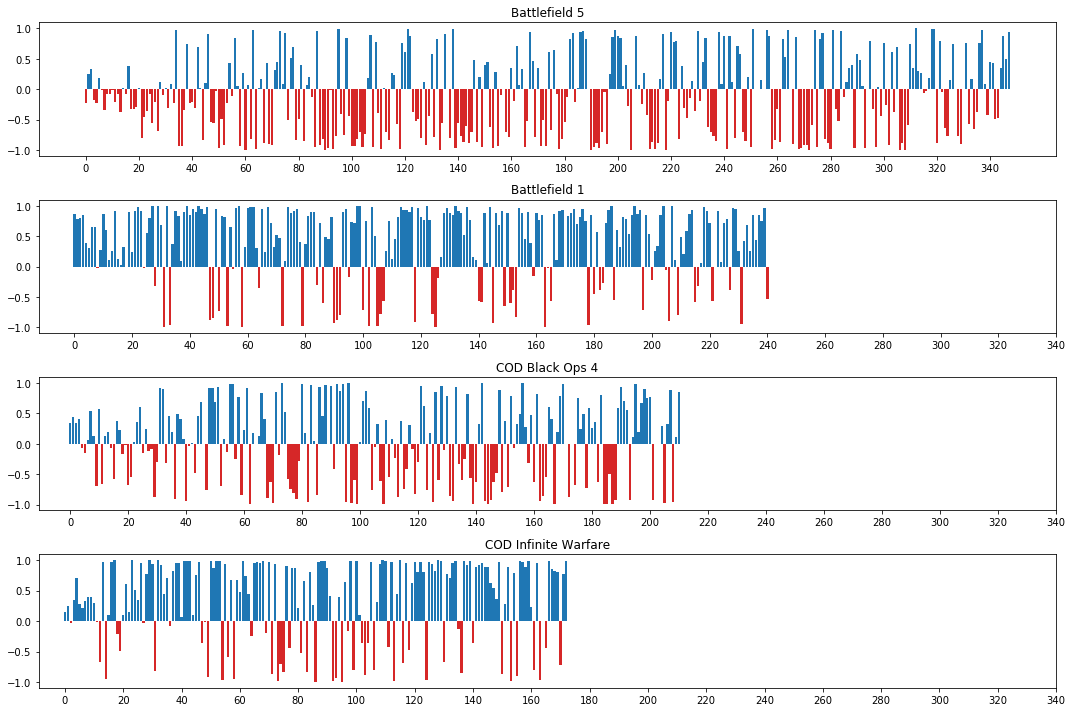

In [43]:
# Let's plot the scores over time

fig, axs = plt.subplots(4,1, figsize=(15,10))
for ax, sid in zip(axs.ravel(), sids_data):
    ax.bar(x=sid[1].index, height=sid[1]["sid"], color=sid[1]["color"])
    ax.set_xticks(np.arange(0, len(bf5_dailysid_r), step=20))
    ax.set_title(sid[0])
plt.tight_layout()
plt.show()

We can see that BF5 had a difficult launch. Over time, DICE managed to improve the game and get a somewhat more balanced ditribution between positive vs negative reviews, but it does not seem like the player base was overwhelmingly happy as it looks like was the case for BF1. <br>
As for COD, Infinite Warfare seems to have performed better in terms of reviews compared to Black Ops. The number of positive review days is larger and the average scores are also higher. Note how in the first 50 days, Infinite Warfare had very few negative reviews! 

## Topic Model (for Battlefield 5, only)

In [44]:
# Topic model tries to extract groups od documents that share a particular topic in common
# In our use case, we want to roughly check what were the discussion topics from reviewers of Battlefield 5

# Let's quickly test LDA method for topic model. First, we build a document-term matrix
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.9 , min_df=5 , stop_words=nlp.Defaults.stop_words)
dtm = cv.fit_transform(bf5_en["review"])

C:\Users\ochib\miniconda3\envs\nlp_course\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ve'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [45]:
# The DTM matrix is a sparse matrix of 700 x 1034
 # 700 is the number of reviews we have (documents)
 # 1034 is the number of words after removing stopwords (terms)
dtm

<700x1033 sparse matrix of type '<class 'numpy.int64'>'
	with 16184 stored elements in Compressed Sparse Row format>

In [46]:
# Now open an instance of the LDA algorithm and fit our document-term matrix 
# I will instruct the algorithm to find 4 topics (assumption)
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components = 4, random_state=5)
LDA.fit(dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=4, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=5, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [47]:
# Check results
print(f"number of features: {len(cv.get_feature_names())}")
print(f"number of components (aka topics): {len(LDA.components_)}")

number of features: 1033
number of components (aka topics): 4


In [48]:
# Check results
# These are the top 10 words that best describe each topic
# Top 10 is ranked according to the probability of these words showing up in these clusters 

for i, comp in enumerate(LDA.components_):
    list_top10 = []
    for idx in comp.argsort()[-10:]:
        list_top10.append(cv.get_feature_names()[idx])
    print(f"Topic {i}: {list_top10}")

Topic 0: ['playing', 'fun', 'dice', 'buy', 'played', 'people', 'lot', 'bugs', 'ea', 'don']
Topic 1: ['story', 'time', 'ww2', 'best', 'good', 'women', 'war', 'history', 'ea', 'dice']
Topic 2: ['bf1', 'gameplay', 'don', 'war', 'maps', 'ea', 'buy', 'bad', 'ww2', 'good']
Topic 3: ['player', 'bf1', 'played', 'maps', 'time', 'fun', 'good', 'feels', 'campaign', 'multiplayer']


A course look at the words, these are descriptions that I can think of for the labels: <p>
Topic 0 looks like reviews are discussing bugs <br>
Topic 1 seems to be about people discussing the historical accuraccy and the presence of woman <br>
Topic 2 is hard to categorize. I will leave it as "Other". <br>
Topic 3 are people discussing multiplayer and campaign.  

In [49]:
# Now let's add the topic labels to our original BF5 review dataset

# Get topic labels for each document
topic_results = LDA.transform(dtm)

# Add columns for each topic probability
colnames = []
for colno in range(topic_results.shape[1]):
    colname = "Topic "+str(colno)
    colnames.append("Topic "+str(colno))
    bf5_en[colname] = topic_results[:,colno]

# Add a column that picks the highest probability and assigns the topic number
bf5_en["Selected Topic"] = bf5_en.apply(lambda x: np.argmax(np.array([x[colnames]])), axis=1)

# Add labels for the topic number
bf5_en["Selected Topic"] = bf5_en["Selected Topic"].map({0:"Bugs", 1:"History", 2:"Other", 3:"Multiplayer"})

In [50]:
# Check how table looks like now
bf5_en.head()

,game_title,name,date,score,review,lang,sid,date_fmt,Topic 0,Topic 1,Topic 2,Topic 3,Selected Topic
0,Battlefield 5,Goji0v,"Jun 20, 2022",8,After last BF this is really so good. Optimiza...,en,0.9417,2022-06-20,0.029854,0.028765,0.912592,0.028789,Other
1,Battlefield 5,Skapple,"May 29, 2022",0,i didn't play the game on realease but rn it's...,en,0.4946,2022-05-29,0.030786,0.029443,0.029030,0.910742,Multiplayer
2,Battlefield 5,angrygamer333,"Jul 7, 2019",6,The most dissapointing game of the battlefield...,en,-0.8074,2019-07-07,0.025660,0.025221,0.025439,0.923680,Multiplayer
3,Battlefield 5,DoritosGamer,"Mar 21, 2022",8,"One of the best Battlefield i was played, he h...",en,0.8691,2022-03-21,0.043811,0.046050,0.043674,0.866465,Multiplayer
4,Battlefield 5,dankmeow,"Mar 16, 2022",7,Its battlefield again but it feels it doesnt q...,en,0.3506,2022-03-16,0.043336,0.041694,0.043744,0.871226,Multiplayer


In [51]:
# Let's check how many reviews were assigned to each topic
bf5_en[["review", "Selected Topic"]].groupby("Selected Topic").count().reset_index()

,Selected Topic,review
0,Bugs,166
1,History,137
2,Multiplayer,178
3,Other,219


In [52]:
# Check topics
check_topic0 = bf5_en.sort_values("Topic 0", ascending=False).reset_index()
check_topic1 = bf5_en.sort_values("Topic 1", ascending=False).reset_index()
check_topic2 = bf5_en.sort_values("Topic 2", ascending=False).reset_index()
check_topic3 = bf5_en.sort_values("Topic 3", ascending=False).reset_index()

# Check reviews that had the highest probabilities for Topic 0
def check_topic(data, topiccol, topX):
    for idx in range(topX):
        print(data.loc[idx, "Selected Topic"])
        print(data.loc[idx,topiccol])
        print(data.loc[idx,'review'])
        print()

In [53]:
# Topic 0
check_topic(check_topic0, 'Topic 0', 5)

Bugs
0.9913161084437376
I was like: Ok I don´t care about all the SJW stuff, It cannot be so bad.But after Played Multiplayer, I would love to have my money back and never again buy any game from DICE.Historical accuracy? FORGETT IT you are NOT Fighting in the 2WW.  Some Women Fought in the war but you will find some sort of non binary Woman Soldier, the same kind of person who is not a man but wants to be...I was like: Ok I don´t care about all the SJW stuff, It cannot be so bad.But after Played Multiplayer, I would love to have my money back and never again buy any game from DICE.Historical accuracy? FORGETT IT you are NOT Fighting in the 2WW.  Some Women Fought in the war but you will find some sort of non binary Woman Soldier, the same kind of person who is not a man but wants to be...80% GREY its every where.Soldiers have NO FLAG or Country.  you recognize them cause of the helmet. Both team looks same.Its a Paradise for Campers. hide behind a wall and wait for they to come or sni

In [54]:
# Topic 0
check_topic(check_topic1, 'Topic 1', 5)

History
0.9909997808334832
This game lacks the passion of greats like BFBC, BF3 & 4 and Vietnam, etc. I gave this a zero for how the fanbase was attacked by the Publisher and Dice. I gave this a zero for extremely poor design choices. A zero for the annoying and total out of place screams. A zero for character models that move like they are on crack. A zero for a lack of a WW2 feeling. Listen to EA sponsored WestieThis game lacks the passion of greats like BFBC, BF3 & 4 and Vietnam, etc. I gave this a zero for how the fanbase was attacked by the Publisher and Dice. I gave this a zero for extremely poor design choices. A zero for the annoying and total out of place screams. A zero for character models that move like they are on crack. A zero for a lack of a WW2 feeling. Listen to EA sponsored Westie on Youtube and he tries to prop up this pile of rubbish. EA probably spends more on fake social media accounts. Here is theory, make a good game and the fans will buy. Heck if Dice listened 

In [55]:
# Topic 2
check_topic(check_topic2, 'Topic 2', 5)

Other
0.9929419404349232
Lets be honest, you don't buy an war game expecting learn WWII history, real facts. This is an entertainment game, then lets talk about a game, if you wanna learn about WWII just buy an historic book. Then...After the total fails about BF1 my expectations was very very very low about BFV, with beta don't look better, my beta experience was shot and really not good.  As war games fan ILets be honest, you don't buy an war game expecting learn WWII history, real facts. This is an entertainment game, then lets talk about a game, if you wanna learn about WWII just buy an historic book. Then...After the total fails about BF1 my expectations was very very very low about BFV, with beta don't look better, my beta experience was shot and really not good.  As war games fan I start play the final version released on 20, and had a great surprise, final game has great game play, speed and gameplay mechanics, feels as good as BF4 or BF3. Bad:I still dislike any graphic detail

In [56]:
# Topic 3
check_topic(check_topic3, 'Topic 3', 5)

Multiplayer
0.9953720597167406
Is it fun? Yes, it definitely is I’ve loved every minute of the 25+ hours I’ve put into the multiplayer. The multiplayer is a lot more tactical then Battlefield 1 and a little slower Paced as well, (but not to slow) a lot more destruction and more realistic destruction like pieces of building hanging when you blow a hole into the wall, or being able to shoot through the wall with highIs it fun? Yes, it definitely is I’ve loved every minute of the 25+ hours I’ve put into the multiplayer. The multiplayer is a lot more tactical then Battlefield 1 and a little slower Paced as well, (but not to slow) a lot more destruction and more realistic destruction like pieces of building hanging when you blow a hole into the wall, or being able to shoot through the wall with high power weapons and hit someone on the other side. The new attrition system and faster time to kill makes it so everyone has to work together to assault a position, and I’ve noticed that teammates

This is essentially the end of this project. Some points to think about:

- Comparing the labels and the review content, I would say that topic model did an OK job in classifying reviews (sometimes it gets it right) <br>
- It is far from perfect and perhaps a there is a better algorithm out there for text sizes that are not particularly big. Since LDA works with probability, if a text is too small (ex: a one line review), a single exceptional word could have a lot of influence and distort results (some research needed on that) <br> 
- Also, some reviews seem to have rows repeating in the middle of the text. This is probably damaging results (need to check why on the webscraping session) <br>

THANKS!